# L5 Logistic回归编程作业

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import expit

class Logistic_Regression:
    def __init__(self,learning_rate=0.01,max_iterations=1000):
        self.learning_rate = learning_rate
        self.max_iterations = max_iterations
        self.w = None
        self.b = None
        self.loss_history = []

    def sigmoid(self,z):
        return expit(z)
    
    def fit(self,X,y):
        sample_num,feature_num = X.shape
        self.w = np.zeros(feature_num)
        self.b = 0

        for _ in range(self.max_iterations):
            linear_model = np.dot(X,self.w)+self.b
            y_predicted = self.sigmoid(linear_model)

            #计算梯度
            dw = (1/sample_num) * np.dot(X.T,(y_predicted - y))
            db = (1/sample_num) * np.sum(y_predicted-y)
            epsilon = 1e-15  
            y_predicted = np.clip(y_predicted, epsilon, 1 - epsilon)
            loss = (-1 / sample_num) * (np.dot(y, np.log(y_predicted)) + np.dot(1 - y, np.log(1 - y_predicted)))

            #更新权重与偏差
            self.w -= self.learning_rate * dw
            self.b -= self.learning_rate * db
            self.loss_history.append(loss)

        print("权向量为:",self.w)
        print("偏置量为:",self.b)

    def predict(self,X):
        linear_model = np.dot(X,self.w) + self.b
        y_predicted = self.sigmoid(linear_model)
        y_predicted_classify = [1 if i > 0.5 else -1 for i in y_predicted]
        return y_predicted_classify,y_predicted

下面解决第二问，首先要生成题目要求的数据集，根据要求，数据集为两个都具有200个二维向量的X_1和X_2。数据集X_1的样本来自均值向量〖m_1=[-5,0]〗^T 、协方差矩阵s_1=I的正态分布，属于“+1”类，数据集X_2的样本来自均值向量〖m_2=[0,5]〗^T、协方差矩阵s_2=I的正态分布，属于“-1”类，其中 是一个2*2的单位矩阵。产生的数据中80%用于训练，20%用于测试。由此得出如下的代码。

In [2]:
import numpy as np
from sklearn.model_selection import train_test_split
import time
#设置随机种子
np.random.seed(80)
#生成200个服从正态分布的随机数
samples = 200                  #样本数
interval_1 = np.array([-5,0])  #第一类样本的区间
interval_2 = np.array([0,5])   #第二类样本的区间
cov_matrix = np.array([[1,0],[0,1]]) #协方差矩阵

#生成第一类样本
X_1 = np.random.multivariate_normal(interval_1, cov_matrix, samples)
#生成第二类样本
X_2 = np.random.multivariate_normal(interval_2, cov_matrix, samples)

#将第一类样本的标签设为1
y_1 = np.ones(samples)
#将第二类样本的标签设为-1
y_2 = np.ones(samples) * -1
#将两类样本合并
X = np.vstack((X_1, X_2))
y = np.hstack((y_1, y_2))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30)

print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

    

(320, 2) (320,)
(80, 2) (80,)


下面，我们使用上面的实例，引入上述已经分割好的数据集，利用logistic regression找出分类面,并画出数据集和分类面。

权向量为: [ -5.18531007 -24.21663556]
偏置量为: -4.0077299265619635
[-1, -1, -1, 1, -1, -1, -1, -1, -1, 1, 1, 1, 1, -1, -1, 1, 1, 1, -1, -1, 1, 1, 1, -1, -1, 1, -1, 1, 1, 1, 1, 1, -1, -1, 1, -1, 1, -1, -1, 1, -1, -1, -1, -1, 1, 1, 1, -1, -1, -1, -1, 1, -1, 1, -1, -1, 1, -1, -1, 1, -1, -1, 1, -1, 1, -1, -1, -1, 1, -1, -1, 1, -1, -1, 1, 1, -1, 1, -1, -1]
Accuracy: 0.8875
[1.22950853e-03 5.77204561e-66 3.95286874e-46 1.00000000e+00
 8.87174854e-31 6.10643757e-52 4.03378274e-70 2.45642985e-53
 4.32981223e-34 1.00000000e+00 9.99098896e-01 1.00000000e+00
 9.99839987e-01 4.02371990e-01 5.16042281e-14 1.00000000e+00
 1.00000000e+00 1.00000000e+00 5.16508851e-49 9.37765384e-57
 9.99805690e-01 9.99989407e-01 9.99999294e-01 3.28170199e-67
 1.40241801e-06 1.00000000e+00 2.32157158e-63 9.99989117e-01
 1.00000000e+00 9.99999117e-01 1.00000000e+00 9.99996227e-01
 2.91556330e-42 6.83426854e-47 1.00000000e+00 1.00991225e-51
 1.00000000e+00 6.20408392e-55 5.01916574e-44 9.99791270e-01
 3.28754965e-04 4.92659378

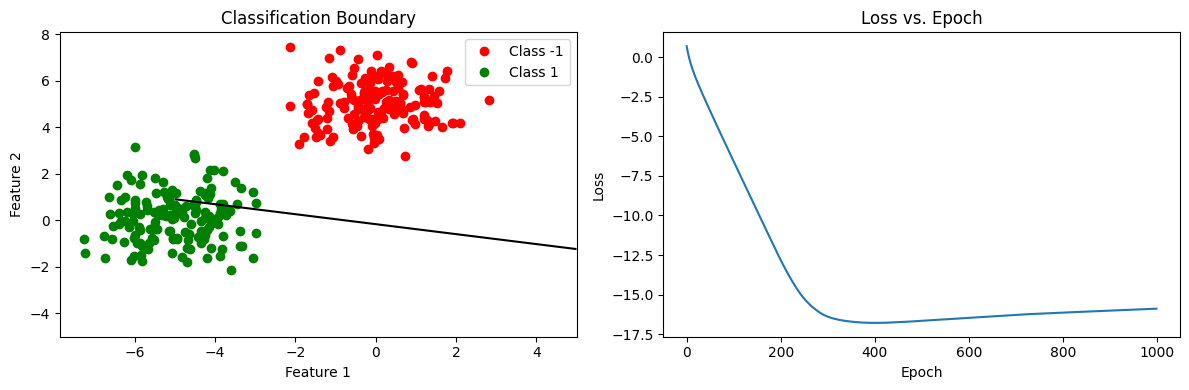

In [3]:
if __name__ == "__main__":

    model = Logistic_Regression(learning_rate=0.01,max_iterations=1000)
    model.fit(X_train,y_train)


    y_pred,y_prob = model.predict(X_test)
    print(y_pred)
    from sklearn.metrics import accuracy_score
    accuracy = accuracy_score(y_test,y_pred)
    print(f"Accuracy: {accuracy}")
    print(y_prob)

    xx, yy = np.meshgrid(np.linspace(-5, 5, 100), np.linspace(-5, 5, 100))
    Z = model.b + model.w[0] * xx + model.w[1] * yy
    label_added_green = False
    label_added_red = False
    plt.figure(figsize=(12, 4))
    plt.subplot(121)
    for i in range(X_train.shape[0]):
        if y_train[i] > 0:
            plt.plot(X_train[i][0], X_train[i][1], 'o', color='green')
            if not label_added_green:
                plt.plot(X_train[i][0], X_train[i][1], 'o', color='green', label='Class 1')
                label_added_green = True    
        else:
            plt.plot(X_train[i][0], X_train[i][1], 'o', color='red')
            if not label_added_red:
                plt.plot(X_train[i][0], X_train[i][1], 'o', color='red', label='Class -1')
                label_added_red = True
    plt.contour(xx, yy, Z, levels=[0], colors='k')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend(loc='upper right')
    plt.title('Classification Boundary')

    plt.subplot(122)
    plt.plot(range(len(model.loss_history)), model.loss_history)
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Loss vs. Epoch')

    plt.tight_layout()
    plt.show()

改变参数，观察分类面的变化，例如改变学习率为0.05，迭代次数为2000次，观察分类面的变化。

权向量为: [ -51.68954182 -240.22791407]
偏置量为: -39.81120755829846
[-1, -1, -1, 1, -1, -1, -1, -1, -1, 1, 1, 1, 1, -1, -1, 1, 1, 1, -1, -1, 1, 1, 1, -1, -1, 1, -1, 1, 1, 1, 1, 1, -1, -1, 1, -1, 1, -1, -1, 1, -1, -1, -1, -1, 1, 1, 1, -1, -1, -1, -1, 1, -1, 1, -1, -1, 1, -1, -1, 1, -1, -1, 1, -1, 1, -1, -1, -1, 1, -1, -1, 1, -1, -1, 1, 1, -1, 1, -1, -1]
Accuracy: 0.8875
[3.96810373e-029 0.00000000e+000 0.00000000e+000 1.00000000e+000
 5.70331853e-299 0.00000000e+000 0.00000000e+000 0.00000000e+000
 0.00000000e+000 1.00000000e+000 1.00000000e+000 1.00000000e+000
 1.00000000e+000 5.25277479e-002 6.31075700e-132 1.00000000e+000
 1.00000000e+000 1.00000000e+000 0.00000000e+000 0.00000000e+000
 1.00000000e+000 1.00000000e+000 1.00000000e+000 0.00000000e+000
 1.54049820e-058 1.00000000e+000 0.00000000e+000 1.00000000e+000
 1.00000000e+000 1.00000000e+000 1.00000000e+000 1.00000000e+000
 0.00000000e+000 0.00000000e+000 1.00000000e+000 0.00000000e+000
 1.00000000e+000 0.00000000e+000 0.00000000e+000 1

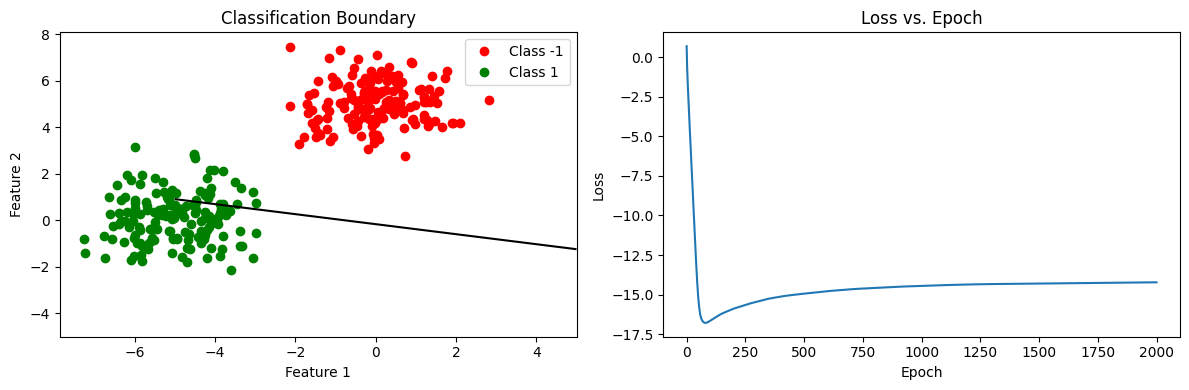

In [4]:
if __name__ == "__main__":

    model = Logistic_Regression(learning_rate=0.05,max_iterations=2000)
    model.fit(X_train,y_train)


    y_pred,y_prob = model.predict(X_test)
    print(y_pred)
    from sklearn.metrics import accuracy_score
    accuracy = accuracy_score(y_test,y_pred)
    print(f"Accuracy: {accuracy}")
    print(y_prob)

    xx, yy = np.meshgrid(np.linspace(-5, 5, 100), np.linspace(-5, 5, 100))
    Z = model.b + model.w[0] * xx + model.w[1] * yy
    label_added_green = False
    label_added_red = False
    plt.figure(figsize=(12, 4))
    plt.subplot(121)
    for i in range(X_train.shape[0]):
        if y_train[i] > 0:
            plt.plot(X_train[i][0], X_train[i][1], 'o', color='green')
            if not label_added_green:
                plt.plot(X_train[i][0], X_train[i][1], 'o', color='green', label='Class 1')
                label_added_green = True    
        else:
            plt.plot(X_train[i][0], X_train[i][1], 'o', color='red')
            if not label_added_red:
                plt.plot(X_train[i][0], X_train[i][1], 'o', color='red', label='Class -1')
                label_added_red = True
    plt.contour(xx, yy, Z, levels=[0], colors='k')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend(loc='upper right')
    plt.title('Classification Boundary')

    plt.subplot(122)
    plt.plot(range(len(model.loss_history)), model.loss_history)
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Loss vs. Epoch')

    plt.tight_layout()
    plt.show()